In [1]:
!pip install shap;
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

In [2]:
data=fetch_california_housing()
df=pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Attribute Information:
  - MedInc:        median income in block group
  - HouseAge:      median house age in block group
  - AveRooms:      average number of rooms per household
  - AveBedrms:     average number of bedrooms per household
  - Population:    block group population
  - AveOccup:      average number of household members
  - Latitude:      block group latitude
  - Longitude:     block group longitude

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [6]:
feature_names=df.drop('target',axis=1).columns.values
feature_names

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'].values.reshape(-1,1),
                                                    test_size=0.2,
                                                    random_state=42)

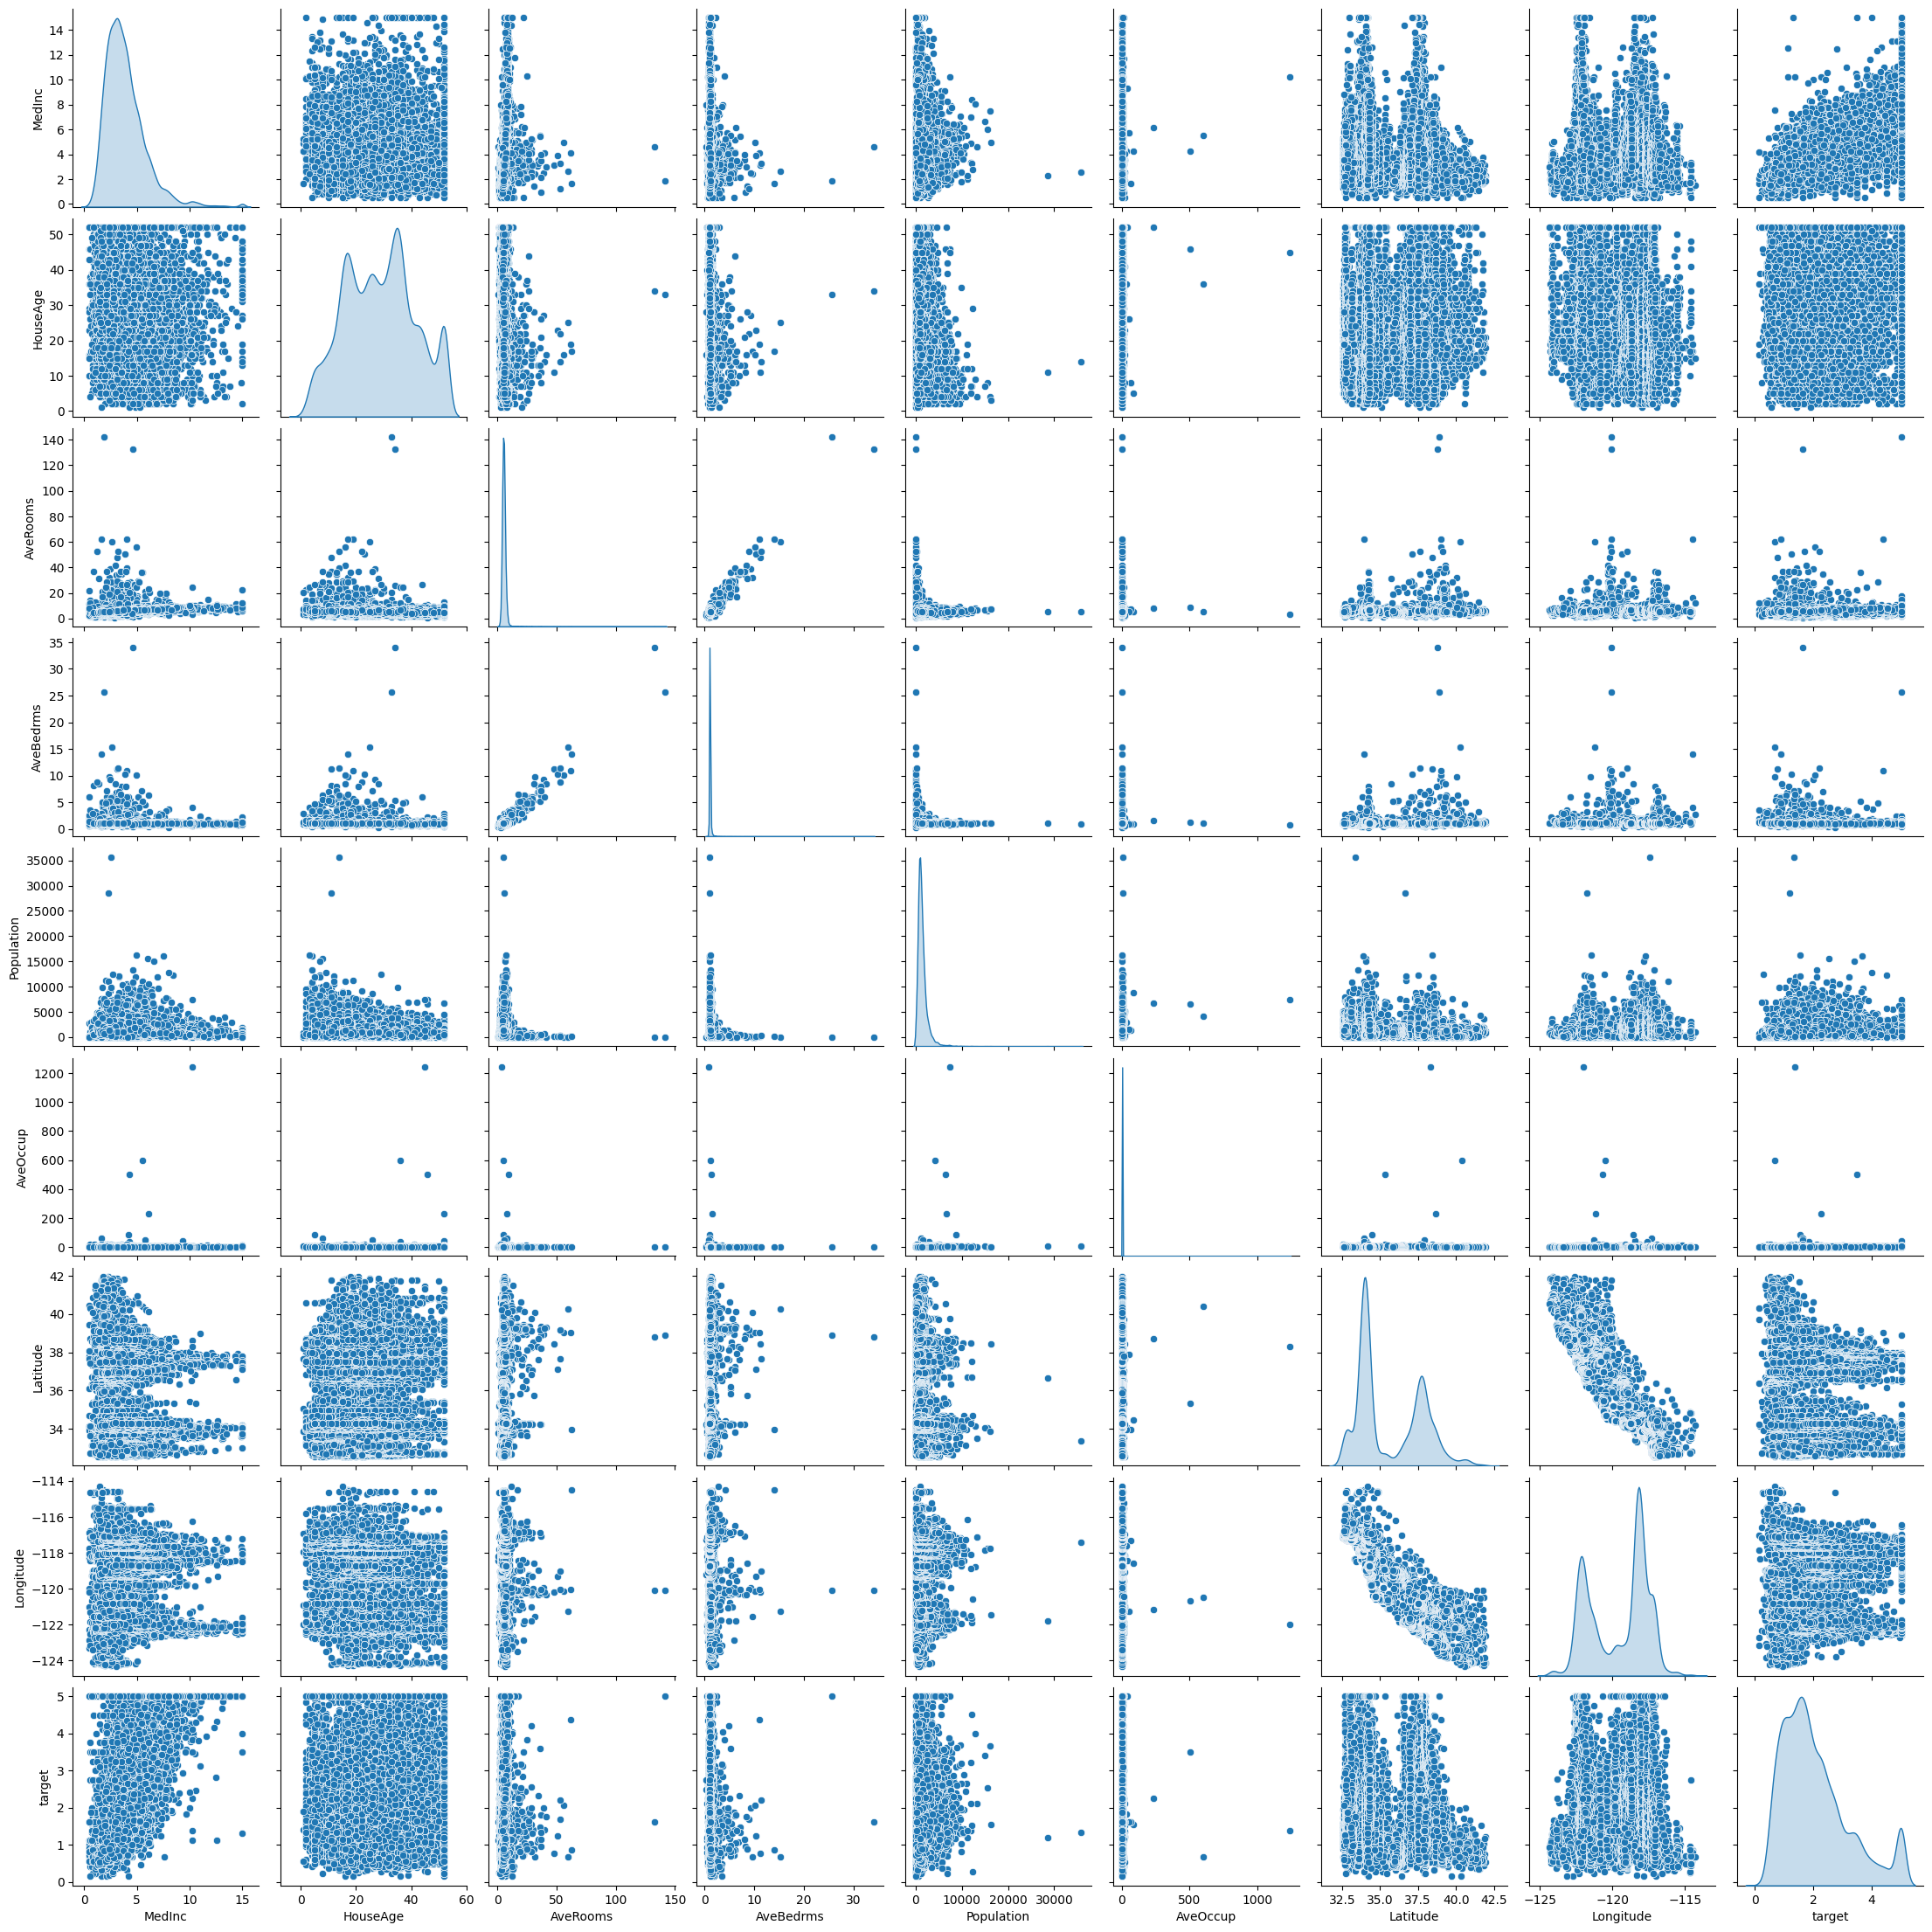

In [8]:
import seaborn as sns
sns.pairplot(data=df, vars=df.columns, diag_kind='kde', kind='scatter')

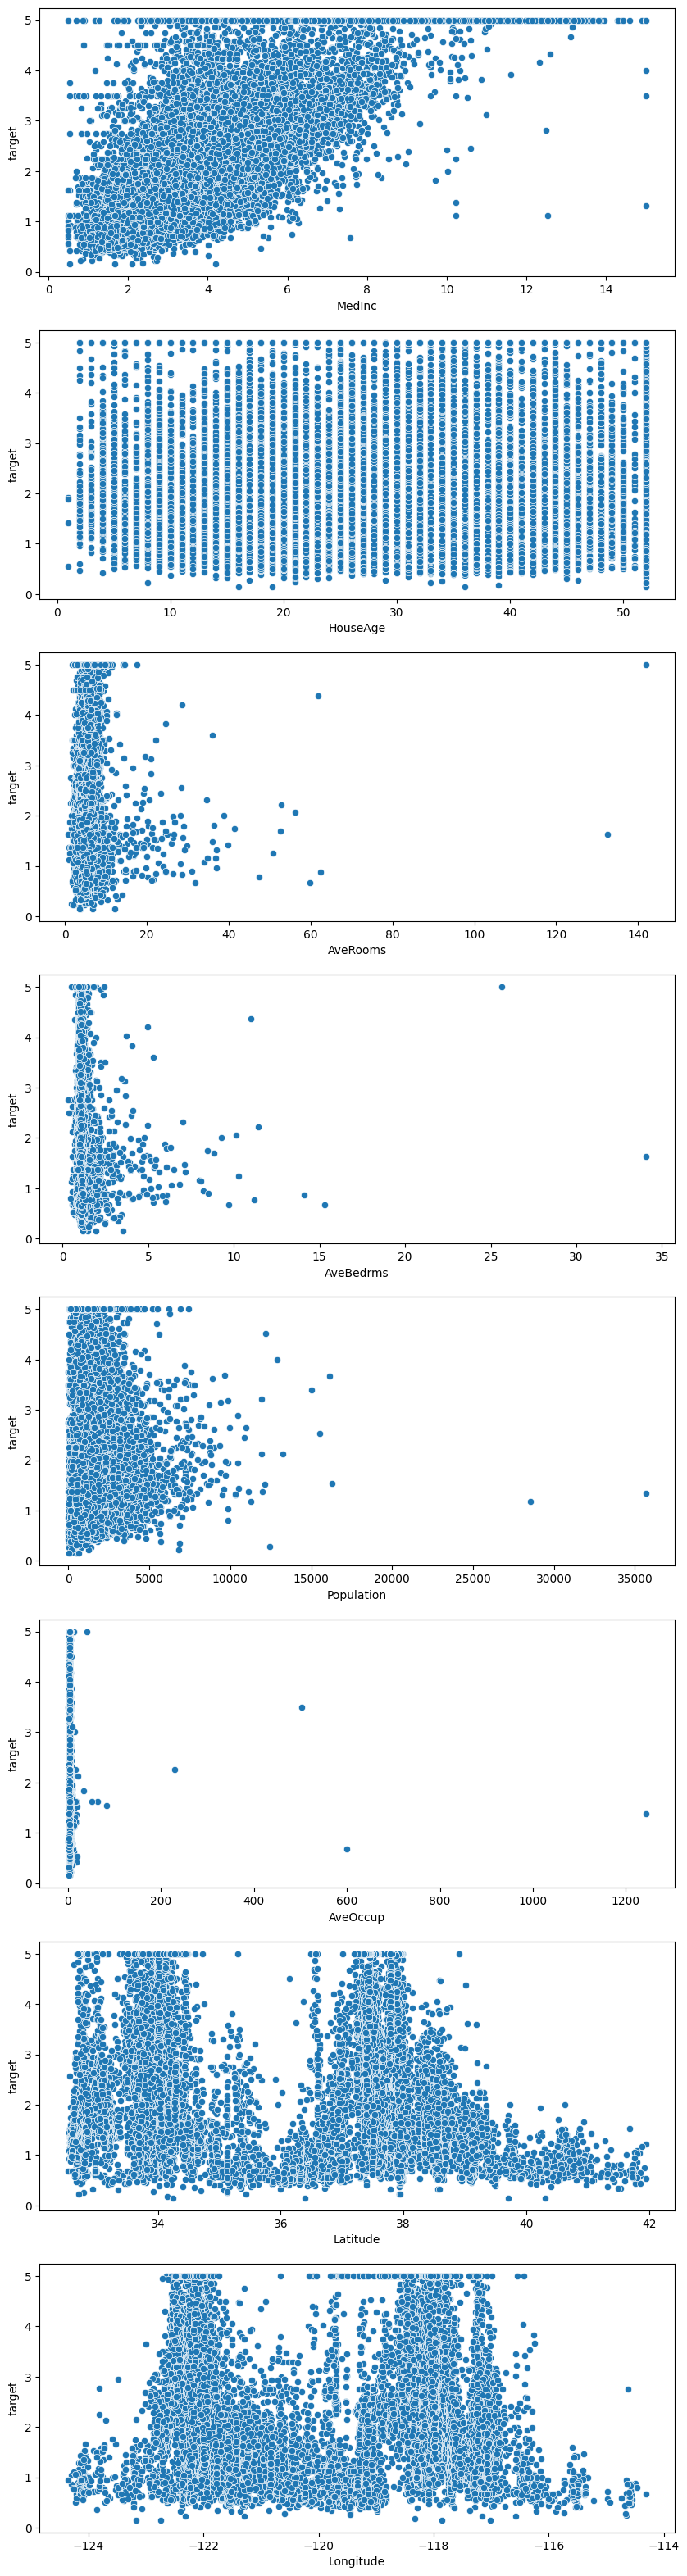

In [9]:
fig, ax = plt.subplots(len(feature_names),1,figsize=(10,5*len(feature_names)))
for i in range(len(feature_names)):
  sns.scatterplot(data=df, x=feature_names[i], y='target', ax=ax[i])
  ax[i].set_xlabel(feature_names[i])

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
model = RidgeCV(alphas=np.logspace(-10, 10, 200))
model.fit(X_train_scaled, y_train.reshape(len(y_train),))

RidgeCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.28989026e-0...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]))

In [12]:
model.alpha_

np.float64(2.24780583354873)

In [13]:
y_pred = model.predict(X_test_scaled)
y_ajuste_train = model.predict(X_train_scaled)

print('Métricas en el entrenamiento')
print(mean_squared_error(y_train, y_ajuste_train))
print(r2_score(y_train, y_ajuste_train))

print('Métricas en el conjunto de prueba')
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

Métricas en el entrenamiento
0.5179335941890365
0.6125508408042315
Métricas en el conjunto de prueba
0.5558093520996523
0.5758504700984467


In [14]:
df_coeficientes=pd.DataFrame(model.coef_.T, index=feature_names)

In [15]:
df_coeficientes

,0
MedInc,0.854256
HouseAge,0.122721
AveRooms,-0.293961
AveBedrms,0.338694
Population,-0.002250
AveOccup,-0.040838
Latitude,-0.895220
Longitude,-0.868111


<Axes: >

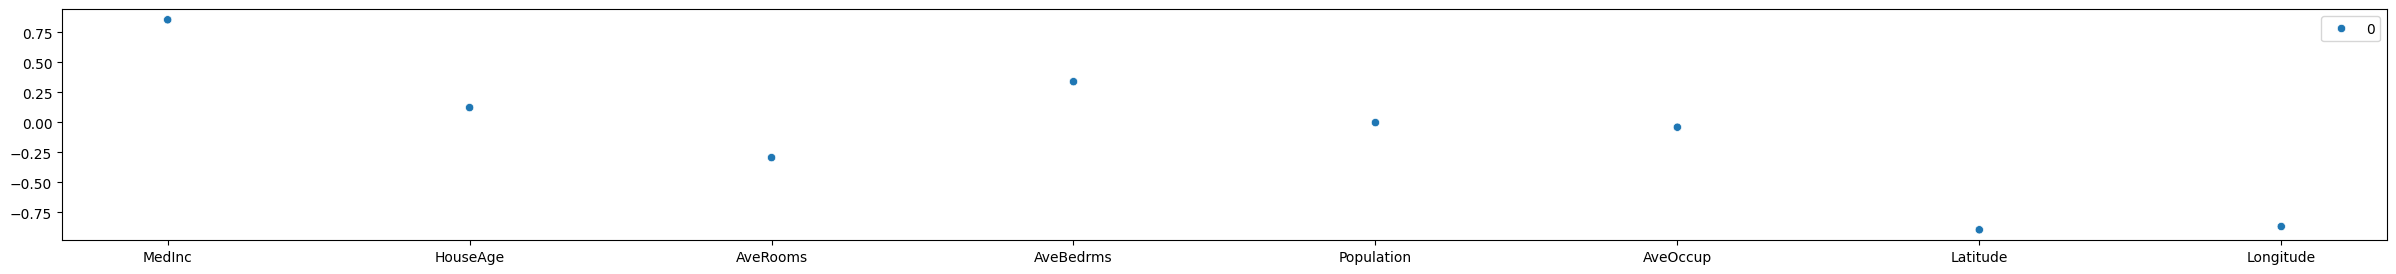

In [16]:
import seaborn as sns
fig, ax=plt.subplots(1,1,figsize=(30,3))
sns.scatterplot(data=df_coeficientes, ax=ax)

# **Explicabilidad SHAP**

In [17]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(model, X_train_scaled, feature_names=feature_names)

In [18]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled)

In [19]:
shap_values.shape

(4128, 8)

In [20]:
explainer.expected_value

np.float64(1.992682391716758)

## Interpretabilidad **local**

In [36]:
shap_values[0]

array([-9.23721490e-01, -2.18133499e-02,  1.38483290e-01, -4.22356619e-02,
        4.19343311e-04, -3.63952489e-03, -2.18085634e-01, -2.02181889e-01])

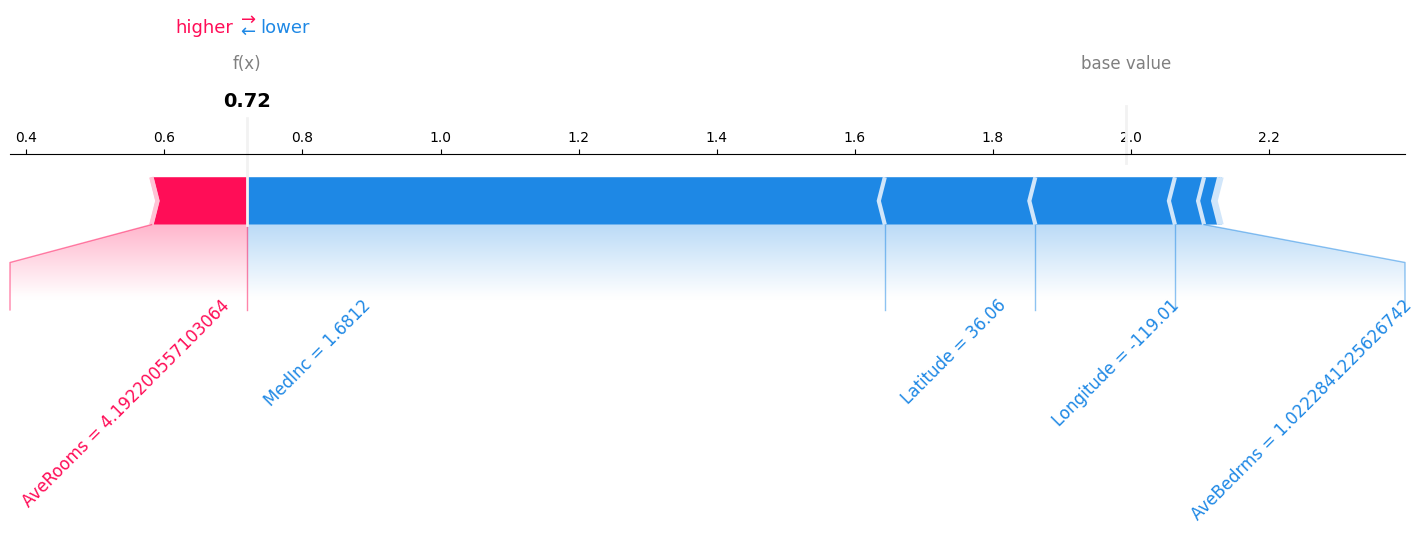

In [37]:
index=0
shap.force_plot(explainer.expected_value, shap_values[index], X_test.iloc[index],
                feature_names=feature_names, matplotlib=True, figsize=(18, 4),
                text_rotation=45)

In [38]:
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=feature_names)

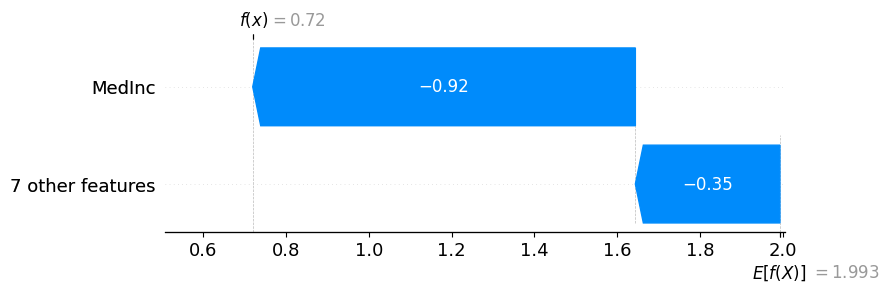

In [42]:
shap.plots.waterfall(explanation, max_display=2)

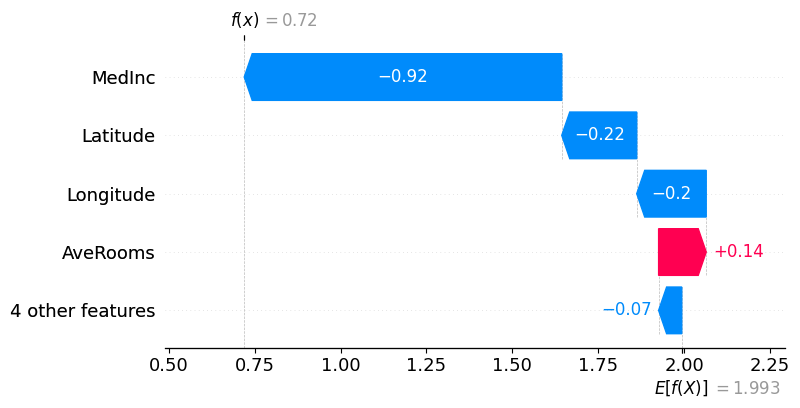

In [25]:
shap.plots.waterfall(explanation, max_display=5)

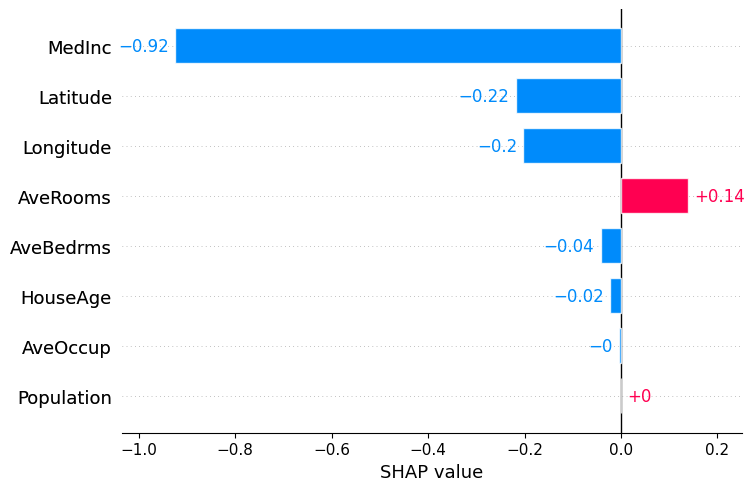

In [26]:
shap.plots.bar(explanation)

## Interpretabilidad **global**

In [27]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test)

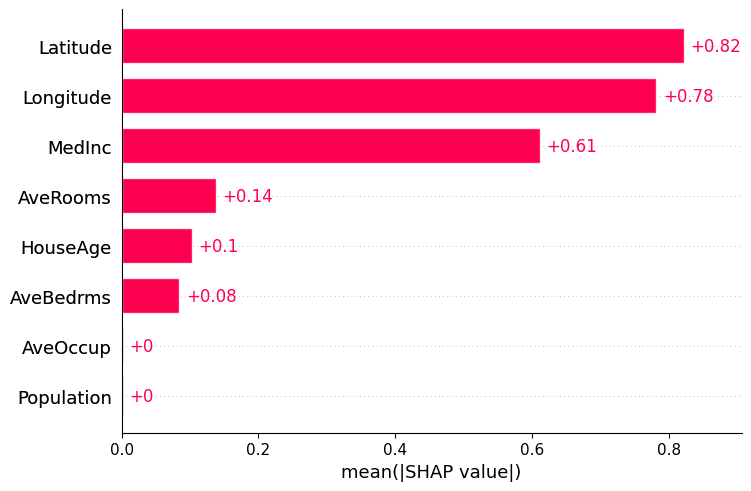

In [28]:
shap.plots.bar(explanation)

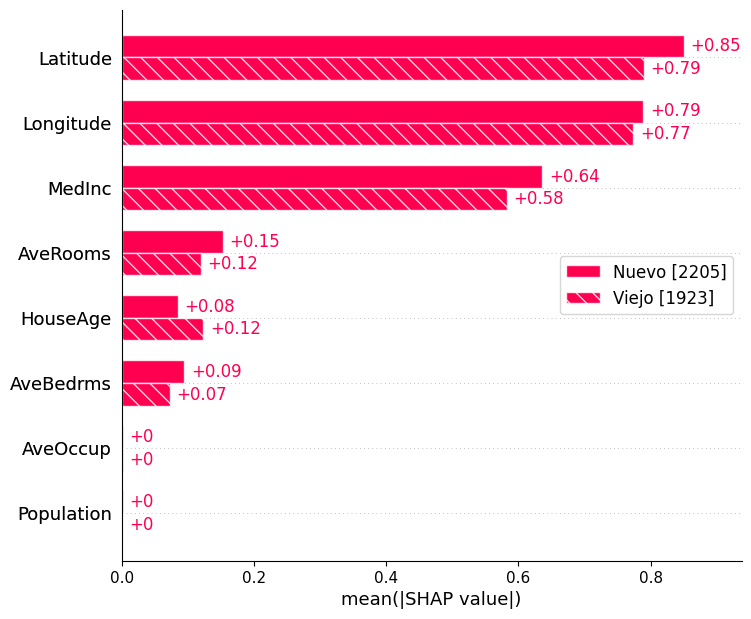

In [29]:
aux = [
    "Viejo" if explanation.data['HouseAge'].iloc[i] > 30 else "Nuevo"
    for i in range(explanation.shape[0])
]
shap.plots.bar(explanation.cohorts(aux).abs.mean(0))

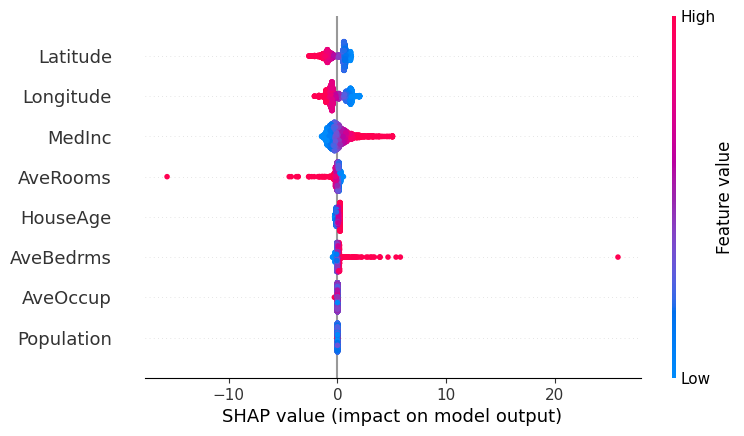

In [30]:
shap.plots.beeswarm(explanation)